## Algoritmos de regresión


### Regresión Lineal con Scikit-learn


**1. Definición y Motivación**

- **¿Qué es la regresión lineal?**
    - La regresión lineal es una técnica estadística utilizada para modelar la relación entre una variable dependiente (target) y una o más variables independientes (predictores) mediante el ajuste de una ecuación lineal.
    - En Scikit-learn, esto se maneja mediante el módulo `LinearRegression`.
- **Casos de uso y ejemplos en la vida real.**
    - Predicción de precios de viviendas a partir de características como área, ubicación, etc.
    - Estimación del rendimiento de los estudiantes en función de horas de estudio, asistencia, etc.
    - Análisis de ventas futuras basadas en publicidad y campañas de marketing.

**2. Conceptos Teóricos**

- **Ecuación de la recta: $y = mx + b$ o $y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$ para múltiples predictores.**
    - Scikit-learn utiliza la forma de matriz de esta ecuación ($y = X \beta + \epsilon$) para múltiples variables.
    - `y` es la variable dependiente, `X` es la matriz de variables independientes, $\beta$ es el vector de coeficientes, y $\epsilon$ es el error.
- **Mínimos cuadrados: minimizar la suma de los cuadrados de los errores.**
    - Scikit-learn resuelve esto utilizando una técnica llamada "Mínimos Cuadrados Ordinarios" para encontrar el mejor $\beta$.
    - La idea es minimizar la suma de cuadrados de las diferencias entre los valores observados y los predichos.
- **Coeficientes y su interpretación.**
    - Los coeficientes $\beta$ representan el cambio en `y` por un cambio unitario en `x`.
    - En Scikit-learn, estos se pueden obtener utilizando `.coef_` y `.intercept_` en el modelo entrenado.

**3. Suposiciones de la Regresión Lineal**

- **Linealidad.**
    - La relación entre las variables dependiente e independiente(s) debe ser lineal.
    - Esto se puede verificar visualmente con gráficos de dispersión o técnicamente con pruebas estadísticas.
- **Independencia.**
    - Los errores (residuos) deben ser independientes.
    - La violación de esto, conocida como autocorrelación, puede ser probada con el test de Durbin-Watson en Python.
- **Homoscedasticidad.**
    - Los errores deben tener constancia de varianza contra los valores ajustados (homoscedasticidad).
    - Si no (heteroscedasticidad), técnicas como la transformación de variables o el uso de modelos robustos pueden ser necesarias.
- **Error normalmente distribuido.**
    - Los errores alrededor de la línea de regresión deben seguir una distribución normal.
    - Esto se puede verificar con un gráfico Q-Q o pruebas como Kolmogorov-Smirnov.

Al enseñar estos conceptos, es importante mostrar código concreto utilizando Scikit-learn para establecer el modelo de regresión lineal, así como métodos para validar estas suposiciones, lo cual se puede lograr usando visualizaciones y tests estadísticos disponibles en bibliotecas como Statsmodels o Seaborn para complementar Scikit-learn.

Coeficientes:  [3.05256732]
Intercepto:  7.007814930166236
Error cuadrático medio:  3.5591686183627114
Coeficiente de determinación:  0.6442427609758692


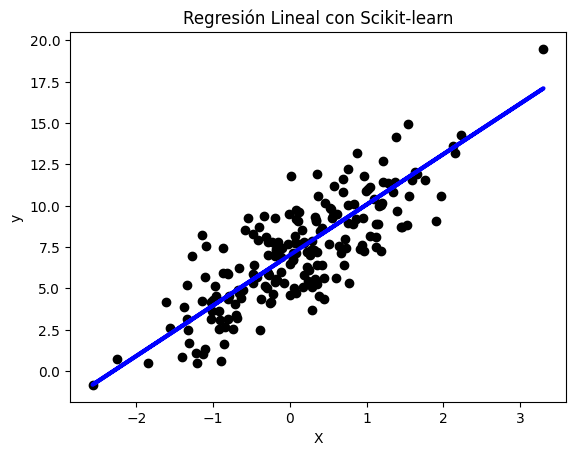

In [57]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear un conjunto de datos simple
# X: características, y: variable objetivo
X = np.random.randn(1000)
y = 3*X + 7 + np.random.normal(0, 2, size=X.shape)
X = X.reshape(-1,1)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficientes: ", model.coef_)
print("Intercepto: ", model.intercept_)
print("Error cuadrático medio: ", mse)
print("Coeficiente de determinación: ", r2)

# Visualizar los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal con Scikit-learn')
plt.show()

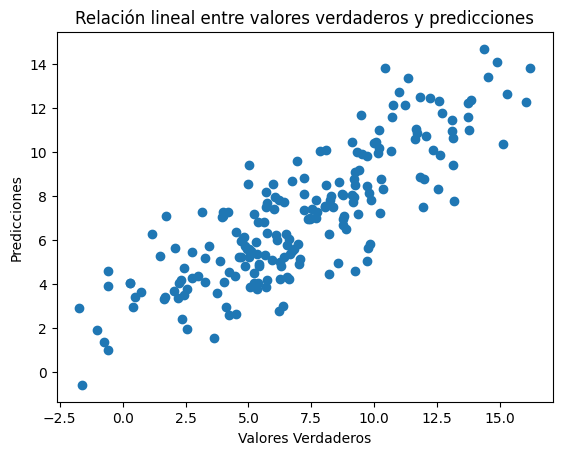

Media de residuos: 0.01629695133284295


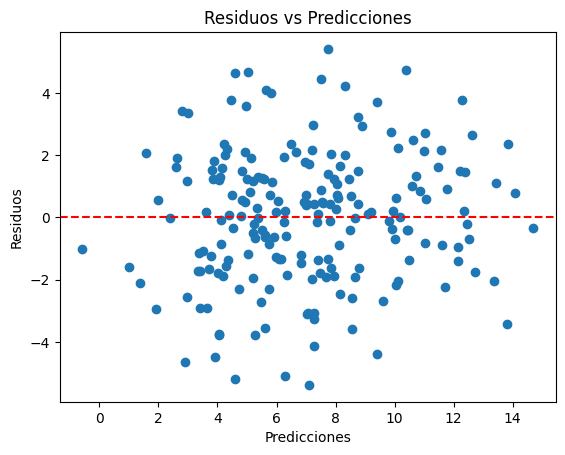

Valor de Durbin-Watson: 1.709591047890702


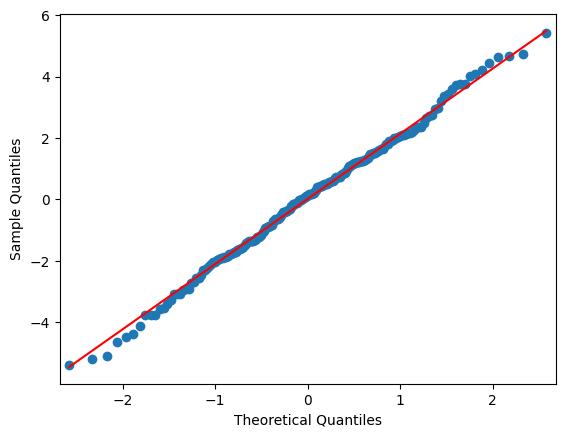

Kolmogorov-Smirnov statistic: 0.19182372012540916
Kolmogorov-Smirnov p-value: 6.406680976781537e-07


In [55]:
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats

# Ajustar el modelo y hacer predicciones
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calcular los residuos
residuos = y_test - y_pred

# 1. Verificar la linealidad
# Esto puede ser visualmente verificado con un gráfico de dispersión de los valores observados versus los predichos
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Verdaderos")
plt.ylabel("Predicciones")
plt.title("Relación lineal entre valores verdaderos y predicciones")
plt.show()

# 2. La media de los residuos debería ser aproximadamente cero
print("Media de residuos:", np.mean(residuos))

# 3. Verificar homocedasticidad (varianza constante de errores)
# Esto también puede ser visualmente verificado con un gráfico de dispersión
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.show()

# 4. Verificar independencia de los errores
# A menudo esto está relacionado con la naturaleza temporal de los datos. Puedes usar el test de Durbin-Watson de statsmodels
dw = sm.stats.durbin_watson(residuos)
print("Valor de Durbin-Watson:", dw)

# 5. Verificar normalidad de los errores
# Esto puede ser visualmente verificado con un QQ plot
sm.qqplot(residuos, line='s')
plt.show()

# Otra opción es realizar una prueba de normalidad como la de Kolmogorov-Smirnov
ks_statistic, ks_p_value = stats.kstest(residuos, 'norm')
print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("Kolmogorov-Smirnov p-value:", ks_p_value)


### Regresión Multiple

La regresión Lineal múltiple es una extensión de la regresión lineal simple y se utiliza para predecir una variable dependiente basada en dos o más variables independientes.

Supongamos que tenemos $n$ observaciones y $p$ variables independientes. La relación entre la variable dependiente $Y$ y las variables independientes $X_1, X_2,\dots,X_p$ se puede expresar como:

$$
Y = \beta_0 + \beta_1X_1+\beta_2X_2+\dots+\beta_pX_p+\varepsilon
$$

Donde:

* $Y$ es la varibale dependiente que queremos predecir.
* $X_1,X_2,\dots,X_p$ son las variables independientes.
* $\beta_0$ es el intercepto.
* $\beta_1, \beta_2,\dots,\beta_p$ son los coeficientes de las variables independientes y representan el cambio en $Y$ por una unidad de cambio en $X_i$, manteniendo constantes las demás variables independientes.
* $\varepsilon$ es el termino de error, que captura la variabilidad de $Y$ que no se puede explicar por las variables independientes, se asume que $E[\varepsilon] = 0$ y que tiene una varianza constante (homocedasticidad).

#### Supuestos de la regresión Lineal múltiple:
* **Linealidad:** La relación entre las variables dependientes e independientes es lineal.
* **Independencia:** Las observaciones son independientes entre sí
* **Hocedasticidad:** La varianza del términ de error $\varepsilon$ es constante para todos los valores de las variables independientes.
* **No multicolinealidad:** Las variables independientes no están perfectamente correlacionadas entre sí, En otras palabras no hay multicolinealidad perfecta.
* **Normalidad:** Para inferencias estadísticas como pruebas de hipótesis, se asume que los errores (residuos) están normalmente distribuidos. Aunque para la esitmación de los coeficientes en sí, este supuesto no es estrictamente necesario. 

#### Estimación de los coeficientes.
Los coeficientes $\beta$ se estiman utilizando el método de los minimos cuadrados (OLS), que minimiza la suma de los cuadrados de los residuos (la diferencia entre los valores observados y los valores predichos por el modelo). Matemáticamente, esto se traduce en:
$$
\min \sum_{i=1}^{n}{(Y_i-\hat{Y_i})^2}
$$

Donde $\hat{Y_i}$ es el valor predicho por el modelo para la observación $i$.



In [5]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = load_boston()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")


MSE: 24.29
R2: 0.67


/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

##### Impacto de los coeficientes

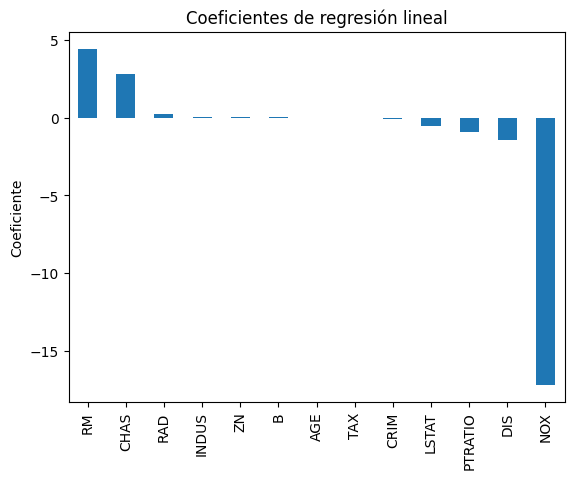

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

coefficients = pd.DataFrame(model.coef_, data.feature_names, columns=['Coefficient'])
coefficients.sort_values(by="Coefficient", ascending=False).plot(kind='bar', legend=False)
plt.ylabel('Coeficiente')
plt.title('Coeficientes de regresión lineal')
plt.show()


#### Prueba de supuestos

1. **Linealidad**

El supuesto de linealidad busca una relación lineal entre las variables independientes y depndientes.

Podemos realizar un scatter plot entre las predicciones y los residuos. Si los puntos están dispersos aleatoriamente alrededor del eje horizontal, es una buena señal de linealidad.

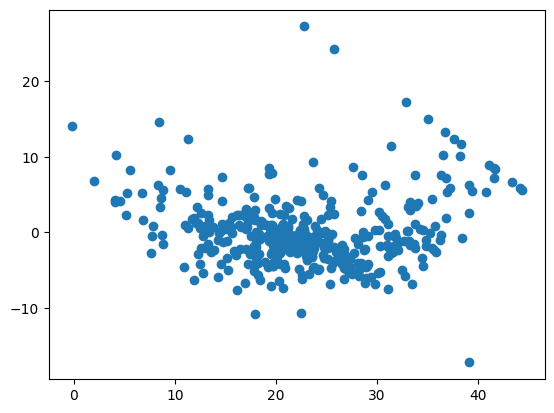

In [8]:
predictions = model.predict(X_train)
residuals = y_train - predictions

plt.scatter(predictions, residuals)

##### Prueba de rainbow 
Es una prueba estadística que compara el ajuste del modelo lineal con el ajuste de un modelo polinómico de mayor grado 

#### Independencia

#### Homocedasticidad

#### Multicolinealidad

#### Normalidad de los errores

### Regresión Polinómica




La regresión polinómica es un tipo de análisis de regresión en el que la relación entre la variable independiente y la variable dependiente se modela con un polinomio de grado n. La regresión polinómica puede captar relaciones no lineales entre las variables pero también puede causar sobreajuste si el grado del polinómio es muy alto. La regresión polinómica se considera un caso especial de regresión lineal múltiple, ya que el problema de estimación es lineal en los coeficientes del polinomio.

#### ¿Cuándo y por qué usar la Regresión Polinómica?
* Cuando las relaciones entre las variables no son lineales y el modelo necesita capturar curvas en los datos.
* Casos en los que la regresión Lineal no proporciona un ajuste suficiente y deja residuos con patrones claros.

#### Ejemplos de datos no lineales.
* Conjuntos de datos económicos donde el crecimiento no es constante (por ejemplo, tasas de interés compuestas).

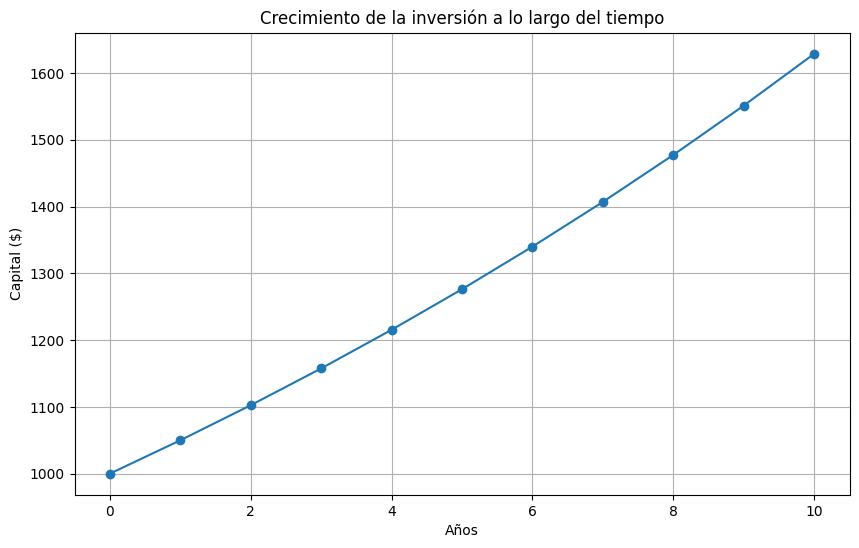

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Parametros iniciales
capital_inicial = 1000 # Capital inicial en USD
tasa_interes = .05 #interés mensual
años = 10

cptl = [capital_inicial]

for n in range(1, años +1):
    cptl.append(cptl[n-1]*(1+tasa_interes))

años = np.arange(0, años +1)

plt.figure(figsize=(10,6))
plt.plot(años, cptl, 'o-')
plt.title("Crecimiento de la inversión a lo largo del tiempo")
plt.xlabel("Años")
plt.ylabel("Capital ($)")
plt.grid(True)
plt.show()



* Datos científicos o de ingeniería que siguen un relación exponencial, logarítmica o sinusoidal (por ejemplo, decaimiento radioactivo, crecimiento de la población)

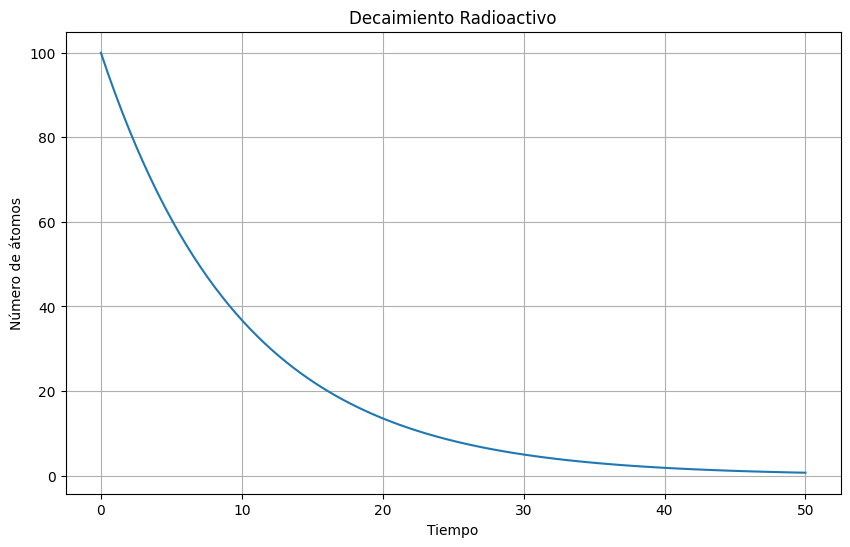

In [2]:
N0 = 100 #número inicial de atomos
lambda_ = 0.1 #constante de decaimiento

t = np.linspace(0,50, 100)

N = N0*np.exp(-lambda_*t)

plt.figure(figsize=(10,6))
plt.plot(t, N, '-')
plt.title("Decaimiento Radioactivo")
plt.xlabel("Tiempo")
plt.ylabel("Número de átomos")
plt.grid(True)
plt.show()

#### Conceptualización
##### Expansión Polinómica:
La regresión polinómica se encarga de introducir potencias de las variables independientes en el modelo de regresión esta técnica busca adaptarse mejor a los datos cuando existe una relación no lineal entre las variables.


La expansión polinómica es un proceso matemático que expresa un producto de sumas como una suma de productos. En otras palabras, se trata de descomponer una expresión polinómica en términos más simples. Un ejemplo común de expansión polinómica es el binomio.

La expansión del binomio, como $(x+y)^n$, se puede obtener utilizando el triángulo de Pascal. Los coeficientes de los terminos en la expansión corresponden a los numeros en la fila $(n+1)$ del triangulo de Pascal. Por ejemplo, al expandir $(x+y)^3$, obtenemos $x^3+3x^2y+3xy^2+y^3$.

Además, la expansión polinómica puede implicar pasos de reescritura anidados múltiples, como trabajar en un esquema de horner para el polinomio que define. El proceso opuesto de tratar de describir un polinomio expandido como un producto se llama factorización polinómica.

In [7]:
def pascal(n):
    # Inicializar la lista vacía
    triángulo = [[1]]
    
    # Generar las filas del triángulo
    for i in range(1, n):
        fila = [1]
        última_fila = triángulo[-1]
        # Generar los elementos de la fila
        for j in range(len(última_fila) - 1):
            elemento = última_fila[j] + última_fila[j + 1]
            fila.append(elemento)
        fila.append(1)
        triángulo.append(fila)
    
    # Imprimir el triángulo
    for fila in triángulo:
        print(fila)

# Llamar a la función para generar el triángulo de Pascal con 5 filas
pascal(5)


[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]


Uso de PolynomialFeatures

MSE entrenamiento:  3.6982044526582287
MSE prueba:  4.9001885793490425


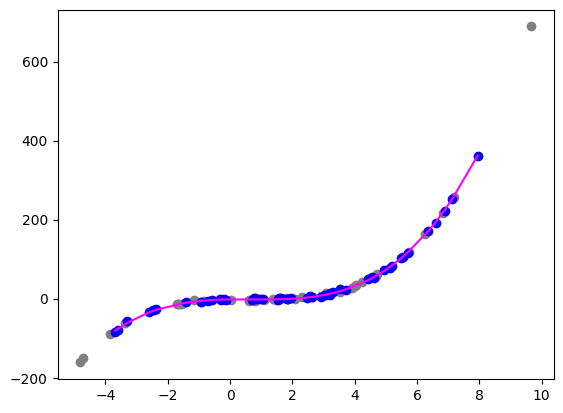

In [7]:

# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import operator

# Generar algunos datos no lineales basados en una función cuadrática
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-2, 2, 100) + np.random.rand()*(X ** 3)
X = X[:, np.newaxis]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Preprocesamiento: Transformación Polinómica
polynomial_features = PolynomialFeatures(degree=3) # Cambiar el grado para experimentar
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Regresión lineal
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Hacer predicciones
y_train_predicted = model.predict(X_poly_train)
y_test_predicted = model.predict(X_poly_test)

# Evaluación del modelo
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted)

print("MSE entrenamiento: ", mse_train)
print("MSE prueba: ", mse_test)

# Visualizar los resultados
plt.scatter(X_train, y_train, color='gray')
plt.scatter(X_test, y_test, color='blue')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test, y_test_predicted), key=sort_axis)
X_test, y_test_predicted = zip(*sorted_zip)
plt.plot(X_test, y_test_predicted, color='magenta')
plt.show()


En esencia la regresión Polinómica es considerada una extensión de la regresión Lineal por varias razones fundamentales:

1. **Naturaleza Lineal de los coeficientes:**

#### Grado del polinomio y overfitting

##### Selección del Grado del polinomio

##### Validación Cruzada

## Regularización

### Ridge

### Lasso

### Elastic Net

## Algoritmos de clustering


### K-means


### DBSCAN


### Clustering Jerarquico

## Validación Cruzada y métricas de evaluación 

### Métodos de validación cruzada: 
* k-fold
* leave-one-out.

### Métricas de evaluación: 
* precisión
* recall 
* F1,
* AUC-ROC.